In [26]:
from numpy import *
import matplotlib.pyplot as plt
import timeit

In [27]:
# Step 1: determine the best and worst values for all
# criteria functions
def best_worst_fij(a, b):
    """ a is the array with the performances and b is
	the criteria min/max array 
	"""
    f = zeros((b.shape[0], 2))
    for i in range(b.shape[0]):
        if b[i] == 'max':
            f[i, 0] = a.max(0)[i]
            f[i, 1] = a.min(0)[i]
        elif b[i] == 'min':
            f[i, 0] = a.min(0)[i]
            f[i, 1] = a.max(0)[i]
    return f

In [28]:
# Step 2: compute the values S_i and R_i
def SR(a, b, c):
    """ a is the array with the performances, b is the
	array with the best and worst performances, and 
	c is the criteria min/max array 
	"""
    s = zeros(a.shape[0])
    r = zeros(a.shape[0])
    for i in range(a.shape[0]):
        k = 0
        o = 0
        for j in range(a.shape[1]):
            k = k + c[j] * (b[j, 0] - a[i, j]) \
                    / (b[j, 0] - b[j, 1])
            u = c[j] * (b[j, 0] - a[i, j]) \
                / (b[j, 0] - b[j, 1])
            if u > o:
                o = u
                r[i] = round(o, 3)
            else:
                r[i] = round(o, 3)
        s[i] = round(k, 3)
    return s, r

In [29]:
# Step 3: compute the values Q_i
def Q(s, r, v):
    """ s is the vector with the S_i values, r is
	the vector with the R_i values, and v is the
	number of criteria 
	"""
    q = zeros(s.shape[0])
    for i in range(s.shape[0]):
        q[i] = round(((v) *
            (s[i] - min(s)) / (max(s) - min(s)) +
            (1 - v) *
            (r[i] - min(r)) / (max(r) - min(r))), 3)
    return q


0.0010510300003261364


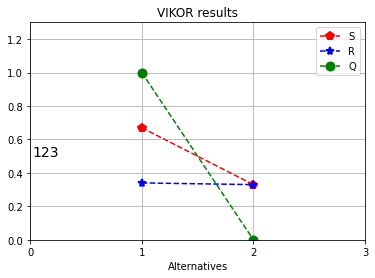

S =  [0.67 0.33]
R =  [0.34 0.33]
Q =  [1. 0.]


<Figure size 432x288 with 0 Axes>

In [30]:

# VIKOR method: it calls the other functions
def vikor(a, b, c, pl):
    """ a is the decision matrix, b is the criteria
	min/max array, c is the weights matrix, and pl 
	is 'y' for plotting the results or any other 
	string for not 
	"""
    s, r = SR(a, best_worst_fij(a, b), c)
    q = Q(s, r, len(c))
    if pl == 'y':
        e = [i + 1 for i in range(a.shape[0])]
        plt.plot(e, s, 'p--', color = 'red', 
			markeredgewidth = 2, markersize = 8)
        plt.text(0.02, 0.5, '123', fontsize=14)

        plt.plot(e, r, '*--',  color = 'blue', 
			markeredgewidth = 2, markersize=8)
        plt.plot(e, q, 'o--', color = 'green', 
			markeredgewidth = 2, markersize = 8)
        # plt.legend(['S', 'R', 'Q'])
        plt.xticks(range(a.shape[0] + 2))
        plt.axis([0, a.shape[0] + 1, 0, 
			max(maximum(maximum(s, r), q)) + 0.3])
        plt.title("VIKOR results")
        text = "Alternatives \n s:{} \n r:{}\n q:{}".format(s,r,q)
        plt.xlabel("Alternatives")
        plt.legend(['S', 'R', 'Q'])
        plt.grid(True)
        plt.show()
        plt.savefig('test_vikor.png')
    return s, r, q 

# performances of the alternatives
x = array([[0.25, 0.25, 0.27], [0.23, 0.29, 0.41]])

# weights of the criteria
w = array([0.33, 0.33, 0.34])

# criteria max/min
crit_max_min = array(['max', 'max', 'max'])

# final results
v=1
start = timeit.default_timer()
vikor(x, crit_max_min, w, v)
stop = timeit.default_timer()
print(stop - start)
s, r, q = vikor(x, crit_max_min, w, 'y')
print("S = ", s)
print("R = ", r)
print("Q = ", q)